# **Welcome to Policy Comparison Notebook**
It is often useful to know when two institutional statements/rules are similar. Such insights are fundamental to policy scholarship, such as how institutions derive from each other, or to even chart an organization or community's evolution over time.

This notebook uses advances in natural language processing to take two separate sets of policy documents encoding two institutions' respective governance architecture, and rank their policies by the degree of shared semantic similarity.


### ***This notebook performs the following tasks***


*   It takes two sets of policy sentences from two different institutions
*  Generates word cloud visualization for both policy sets
* Performs an "all-to-all" comparison between the policy sets
* returns a file with columns for
  * every institutional statement from the first institution
  * every institutional statement from the second institution
  * a numerical similarity (cosine) score for each pair
* visualizes the similarity density across policy pairs

An "all-to-all" comparison is a lot what it sounds like. If the first file has 10 statements, and the second has 15, comparing everything to everything means that the code will perform 150 comparisons in total, and the output file will be a file with 150 rows and 3 columns.

By default, it performs these tasks on example datasets we provide, but the intent is that users can upload their own datasets.

# **Installations and Setup**
* This code sets up the analysis. You don't have to understand it. Just run it and then scroll down.

* These commands below install the necessary components for the rest of the analysis to work. To run press ***ctrl+enter*** keys or select ***Runtime*** from the menu above and then one of the ***Run*** options within it.


In [9]:
!git clone https://github.com/BSAkash/IG-SRL
%cd IG-SRL
!git checkout Akash
!pip install -r ./policy_comparison/requirements.txt
from policy_comparison import policy_comparison
%cd /content/

fatal: destination path 'IG-SRL' already exists and is not an empty directory.
/content/IG-SRL
Already on 'Akash'
Your branch is up to date with 'origin/Akash'.
/content


#**Upload your files and view  your databases db1, db2  here**

* Upload your dataset file here or, to see it run on an example dataset, download the provided example policy sets [FPC_Siddiki.xlsx - Camden Food Security.csv](https://github.com/BSAkash/IG-SRL/blob/Akash/SRL/data/FPC_Siddiki.xlsx%20-%20Camden%20Food%20Security.csv) and [FPC_Siddiki.xlsx - Connecticut Food Policy.csv](https://github.com/BSAkash/IG-SRL/blob/Akash/SRL/data/FPC_Siddiki.xlsx%20-%20Connecticut%20Food%20Policy.csv) (from Siddiki et al., 2019), to see example outputs and to become familiar with the flow.


In [10]:
from google.colab import files
import os
uploaded = files.upload()

Saving FPC_Siddiki.xlsx - Camden Food Security.csv to FPC_Siddiki.xlsx - Camden Food Security.csv
Saving FPC_Siddiki.xlsx - Connecticut Food Policy.csv to FPC_Siddiki.xlsx - Connecticut Food Policy.csv



* Following examples are based on Siddiki Food Policy data
* When you upload your own data, you will likely have to adapt it for this notebook to run.
* Rename your files to names (db1.csv and db2.csv), which the library recognizes. If you are uploading say "filename1.csv" and "filename2.csv" to compare, change following cell to
  # os.rename('<filename1.csv>', 'db1.csv')
  # os.rename('<filename2.csv>', 'db2.csv')
* CSV column containing policy statements should be named `Raw Institutional Statement`

In [11]:
os.rename('FPC_Siddiki.xlsx - Camden Food Security.csv', 'db1.csv')
os.rename('FPC_Siddiki.xlsx - Connecticut Food Policy.csv', 'db2.csv')

* Your uploaded policy files from now on shall be called 'db1' and 'db2' and a sample can be seen below. DB1 is the set of queries, while DB2 is the other policy set to which queries are being compared.

In [12]:
obj = policy_comparison.policy_comparison(agent="strict")
#display preview (top 5 entires) from both policy databases
db1, db2 = obj.show_db()

Policy Database 1:                          Raw Institutional Statement
0  There is hereby established a Camden Food Secu...
1  The voting members of the Board shall be compr...
2  The nonvoting members of the Board shall be co...
3    The Board shall consist of five voting members…
4  ...who shall be appointed by a majority vote o...



Policy Database 2:                          Raw Institutional Statement
0  There is established the Connecticut Food Poli...
1  (b) The council shall consist of the following...
2  The council shall elect a chairperson and a vi...
3  Any person absent from (A) three consecutive m...
4  Vacancies on the council shall be filled by th...


# Word Cloud of the two policy sets

* A "word cloud," which is a visual way to represent text data. The code collects policies from the two sets and generates word clouds describing each institution.

* The size of each word in the cloud corresponds to how often it appears in the text. So, larger words are the most common ones.


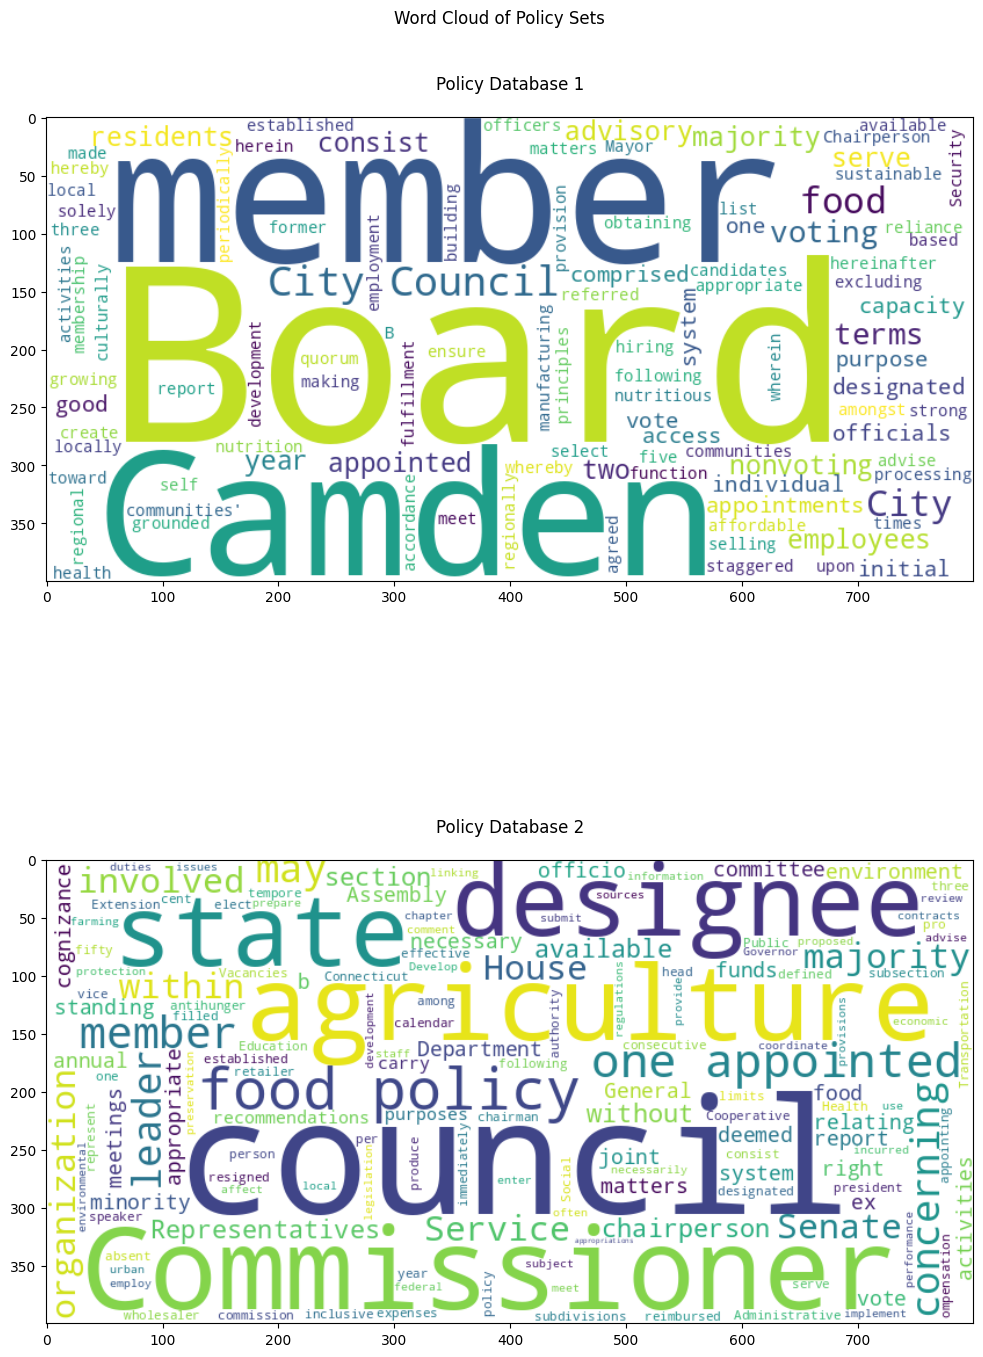

In [13]:
# Plot word cloud of the two policy sets
obj.plot_WordCloud()

#**Sentence Embeddings**

* This code generates numerical representations of each sentence in the databases.

* Each sentence is encoded into a vector of 768 numbers, which are coordinates embedding the policy text in a 768-dimensional semantic space. Interestingly, these coordinates are mapped to texts (in our case policies) in a way such that similar sentences are close to each other and vice versa.

* Thanks to semantic distance preserving properties, these coordinates can therefore be used in clustering and categorizing text, ranking by mutual similarity, text based search and information retrieval.  

* Unlike traditional word based corpus processing, semantic methods are versatile and capable of dealing with a wider range of applications.

* Please note that the runtime of this code depends on the size of the uploaded files db1 and db2

* You may change the top_k to a lower value to narrow your search and select fewer best matches. Say if you want only the best 2 matches to per policy, set this value to 2

In [14]:
query_embeddings = obj.sentence_embeddings_encode(policy_comparison.word_embedding_model, db1['Raw Institutional Statement'])
corpus_embeddings = obj.sentence_embeddings_encode(policy_comparison.word_embedding_model, db2['Raw Institutional Statement'])
search_results = policy_comparison.util.semantic_search(query_embeddings, corpus_embeddings, top_k = db2.shape[0])

#**View your db1, db2 and respective Similarity Scores here**

* Pairs of policies from the two sets are arranged by decreasing order of pairwise similarity

## **Please note** ##

* Semantic similarity is a relative measure. Our application is a search engine that saves the researcher's effort from manual retrieval/comparision, by pairwise comparing and ranking policies across institutions in the order of most to least resemblance.

* However, how and to what extent two policies may be deemed to be similar institutional structures, is greatly subject to the specific context and objectives of a study, and researcher discretion.

* Therefore, there is no widely held consensus on what is an appopriate cosine distance cutoff score for policy text similarity. That is, a particular study may decide pairs scoring above 0.5 as similar, whereas another study may retain results above a more conservative cutoff of 0.9.

* We hereby generate all possible pairwise comparisions between policies from two different datasets/institutions. The cutoff score above which policy pairs are deemed similar is left to the researcher to finalize, upon sampling and subjective assessment of the results below.

In [15]:
# Print the DataFrame with results
result_df = obj.show_results(search_results)

,Policy Database 1,Policy Database 2,Similarity Score
238,"The Board shall advise the City Council on the following matters: A. The building of strong, sustainable, local and regional food systems that ensure Camden's communities' access to affordable, nutritious, and culturally appropriate food for all of Camden's residents at all times. \nB. The development of self-reliance amongst all Camden communities in obtaining their food and to create a system of growing, manufacturing, processing, making available, and selling food that is locally and regionally based and grounded in the principles of food access to all and good health through good nutrition. \n","The council shall: (1) Develop, coordinate and implement a food system policy linking local economic development, environmental protection and preservation with farming and urban issues;",0.722654
170,The Board Chairperson shall be appointed by a majority vote of the Board members.,The council shall elect a chairperson and a vice-chairperson from among its members.,0.705768
239,"The Board shall advise the City Council on the following matters: A. The building of strong, sustainable, local and regional food systems that ensure Camden's communities' access to affordable, nutritious, and culturally appropriate food for all of Camden's residents at all times. \nB. The development of self-reliance amongst all Camden communities in obtaining their food and to create a system of growing, manufacturing, processing, making available, and selling food that is locally and regionally based and grounded in the principles of food access to all and good health through good nutrition. \n",[The Council shall] advise on the state's food policy;,0.705591
255,The Board shall periodically meet…,The council shall meet as often as deemed necessary by the chairperson or a majority of the council.,0.674680
85,The City Council shall select the members of the Board from a list of individual candidates agreed upon by the City Council of the City of Camden.,The council shall elect a chairperson and a vice-chairperson from among its members.,0.674289
68,...who shall be appointed by a majority vote of the City Council of the City of Camden.,The council shall elect a chairperson and a vice-chairperson from among its members.,0.668282
221,The terms of the initial appointments shall be designated by City Council.,Vacancies on the council shall be filled by the\nappointing authority.,0.657715
240,"The Board shall advise the City Council on the following matters: A. The building of strong, sustainable, local and regional food systems that ensure Camden's communities' access to affordable, nutritious, and culturally appropriate food for all of Camden's residents at all times. \nB. The development of self-reliance amongst all Camden communities in obtaining their food and to create a system of growing, manufacturing, processing, making available, and selling food that is locally and regionally based and grounded in the principles of food access to all and good health through good nutrition. \n",[The Council shall] provide information to the Governor on the State's food policy,0.655733
241,"The Board shall advise the City Council on the following matters: A. The building of strong, sustainable, local and regional food systems that ensure Camden's communities' access to affordable, nutritious, and culturally appropriate food for all of Camden's residents at all times. \nB. The development of self-reliance amongst all Camden communities in obtaining their food and to create a system of growing, manufacturing, processing, making available, and selling food that is locally and regionally based and grounded in the principles of food access to all and good health through good nutrition. \n",[The Council shall] review and comment on any\nproposed state legislation and regulations that would affect the food policy system of the state;,0.646866
222,The terms of the initial appointments shall be designated by City Council

#**View Similarity Score PDF (Probablity Distribution Function) here**

* Similarity scores are numerical values , based on cosine distance betweeen text vectors/embeddings, that quantify how alike or different items are. The plot uses a smooth curve to illustrate this distribution.

* Higher values of similarity scores indicate greater likeness between text pairs and vice versa.

* The curve's shape reveals important information. If it's tall and narrow at a certain score, it indicates that scores around that value are common. Conversely, a wide, flat curve suggests scores are spread out and less predictable.

* The y-axis, labeled "Probability Density," measures the likelihood of specific scores. Higher peaks on the curve signify that scores around those peaks are more probable.

* In essence, this plot serves as a visual representation of the data, offering insights into how often different similarity scores appear. It aids in understanding the distribution of similarities within the dataset, highlighting patterns and trends.

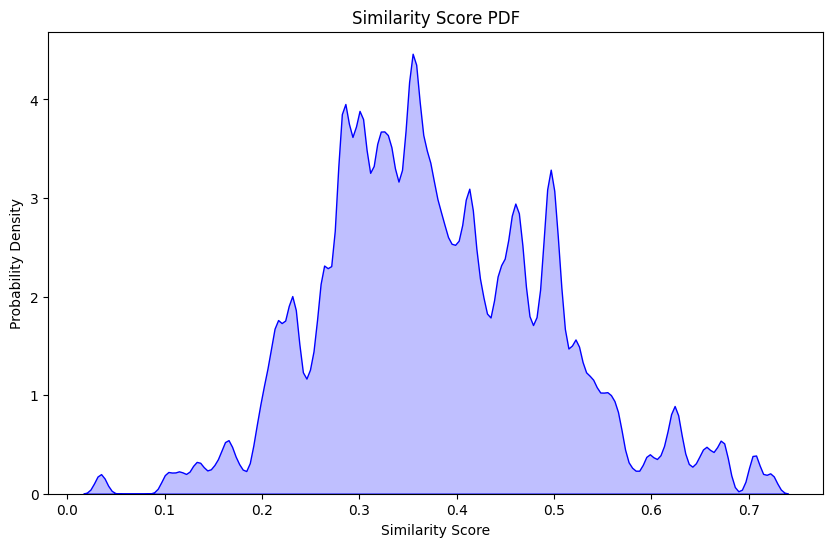

In [16]:
# Plot for Frequency of Similarity scores
obj.plot_similarity_frequency(result_df)


#**Convert results to `.csv` and download**

Search results should automatically download into your browser once the notebook completes it's run. If not, you may open the navigation panel in the left hand side to download 'main.csv'

In [17]:
csv_file_path = "main.csv"
result_df.to_csv(csv_file_path, index=False)
files.download(csv_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Going deeper**

People with programming experience can modify this notebook, and learn about the method in the process. More details about semantic similarity, semantic search, transformer-based word-embeddings, and other parts of this notebook are in the [README file](https://github.com/BSAkash/IG-SRL/blob/Akash/README.md).